## Imports

In [1]:
import gym
from gym.envs.box2d.lunar_lander import heuristic
import imageio
from IPython.display import Image, HTML, clear_output
import logging
import matplotlib.pyplot as plt
import numpy as np

saveImgs = False

## Get LunarLander env

In [2]:
env = gym.make('LunarLander-v2')
env._max_episode_steps = 250
gym.logger.setLevel(logging.ERROR)

## Useful functions

In [3]:
def run_episodes(env, policy):
    frames = []
    observation = env.reset()
    done = False
    while not done:
        frames.append(env.render(mode='rgb_array'))
        action = policy(env, observation)
        observation, reward, done, info = env.step(action)
    return frames

## Heuristic policy test

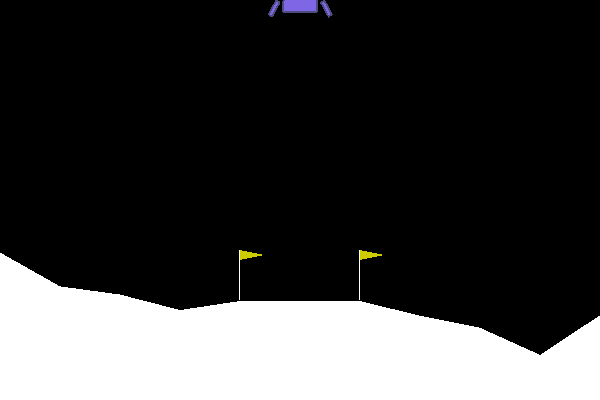

In [11]:
def heuristic_policy(env, observation):
    return heuristic(env.unwrapped, observation)

episodes = run_episodes(env, heuristic_policy)
if saveImgs:
    imageio.mimsave('imgs/heuristic_policy.gif', episodes, fps=45)
Image("imgs/heuristic_policy.gif")

## Random policy test

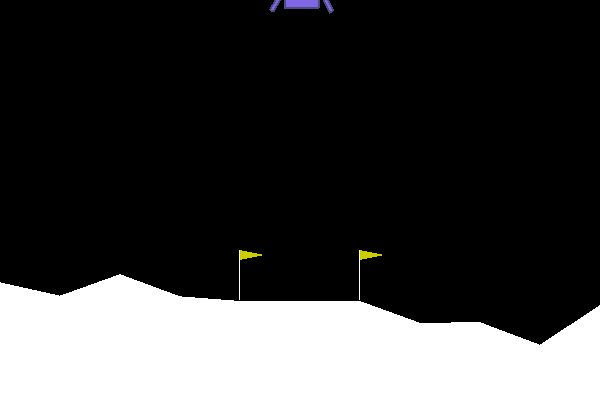

In [16]:
def random_policy(env, observation):
    return env.action_space.sample()
episodes = run_episodes(env, random_policy)
if saveImgs:
    imageio.mimsave('imgs/random_policy.gif', episodes, fps=45)
Image("imgs/random_policy.gif")

## Training loop

In [4]:
def training(agent, env, number_of_episodes=3000, saveEpisodeInterval = 3001, printRewardInterval = 2):

    rewards_per_episode = []
    frames_per_episode = []

    for episode_idx in range(number_of_episodes):

        # print previous episode results at wanted interval
        if (episode_idx+1) % printRewardInterval == 0:
            clear_output()
            plt.xlim(0, number_of_episodes)
            plt.plot(rewards_per_episode)
            plt.pause(0.0001)
            print(f"Episode n°{episode_idx}: {sum_rewards} rewards")
    
        # reset episode var
        frames = None
        state = env.reset()
        sum_rewards = 0

        # save frames at wanted interval
        if (episode_idx+1) % saveEpisodeInterval == 0:
            frames = []

        while True:

            # save frames at wanted interval
            if frames is not None:
                frames.append(env.render(mode='rgb_array'))

            # Take action
            action = agent.decide(state)
            next_state, reward, done, info = env.step(action)
            sum_rewards += reward

            # Store information for training
            agent.observe(state, action, reward)

            # Train agent with observed episode
            if done:
                rewards_per_episode.append(sum_rewards)

                # save frames at wanted interval
                if frames is not None:
                    frames_per_episode.append(frames)

                # train agent
                agent.train()
                break

            state = next_state
            
    return frames_per_episode, agent